In [ ]:
#Results visualization Plot Brier Score over 10 year study time

In [ ]:
! pip install sklearn-pandas
! pip install pycox
! pip install lifelines

     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 1.9MB 21.7MB/s 
     |████████████████████████████████| 122kB 47.1MB/s 
     |████████████████████████████████| 358kB 45.0MB/s 
     |████████████████████████████████| 2.2MB 44.8MB/s 
     |████████████████████████████████| 358kB 12.4MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4050 sha256=e83e1025d5b859f91a327842ac36b4eab460379c166814e0b7b6146a641db40b
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
import pandas as pd
import numpy as np

In [10]:
#data Summary for colon and rectal cancer
ndata = "colon"
main_folder = '/content/drive/My Drive/deepsurv_DTF/TCGA/'
type_folder = main_folder + ndata + "/" #change it to the path to deepsurv directory



fac_folder = type_folder + 'fac/'
ind_folder = type_folder + 'ind/'
data_folder = type_folder + ndata + '_clean/'
result_folder = main_folder + 'results/'


clinical = pd.read_csv(data_folder + ndata + "_clinic.csv") #read in clinical data


Y = np.array(clinical["OS.time"])
E = np.array(clinical["OS"])
Age = np.array(clinical["agegroup"])
Stage = np.array(clinical["stagegroup"])
if ndata != "breast": Gender = np.array(clinical["gender_n"])


In [11]:
clinical.describe()

,Unnamed: 0,age,OS,OS.time,DSS,DSS.time,gender_n,agegroup,stagegroup
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,3735.172515,64.260234,0.216374,949.131579,0.102339,949.131579,0.546784,0.479532,0.476608
std,2669.344673,13.195111,0.412376,829.899692,0.303538,829.899692,0.498536,0.500313,0.500184
min,1954.000000,31.000000,0.000000,6.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,2225.250000,55.000000,0.000000,390.250000,0.000000,390.250000,0.000000,0.000000,0.000000
50%,2321.500000,66.000000,0.000000,669.000000,0.000000,669.000000,1.000000,0.000000,0.000000
75%,2408.750000,74.750000,0.000000,1158.750000,0.000000,1158.750000,1.000000,1.000000,1.000000
max,8536.000000,90.000000,1.000000,3650.000000,1.000000,3650.000000,1.000000,1.000000,1.000000


In [12]:
print("Sample Size: " + str(len(E)) +"   Event num:" + str(E.sum()) + "   Event Rate:" + str(round(E.sum()/len(E),2)))

print("Stage I II: " +  str(len(Stage) - Stage.sum()) + "Stage III IV: " + str(Stage.sum()))

if ndata != "breast": print("Gender info Male:" + str(Gender.sum()) + "   Female: " + str(len(Gender) - Gender.sum()))

Sample Size: 342   Event num:74   Event Rate:0.22
Stage I II: 179Stage III IV: 163
Gender info Male:187   Female: 155


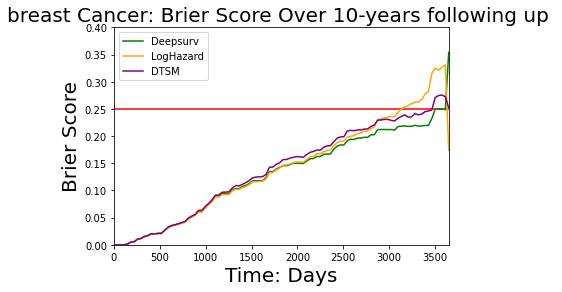

In [14]:
#plot BS over time
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

ndata = "breast"


main_folder = '/content/drive/My Drive/deepsurv_DTF/TCGA/'

result_folder = main_folder + 'results/'



Brier_ds= pd.read_csv(result_folder + ndata + "Deepsurv" + "BSovertime.csv", sep=',',header=None).values
Brier_logh= pd.read_csv(result_folder + ndata + "Loghazard" + "BSovertime.csv", sep=',',header=None).values
Brier_dtsm= pd.read_csv(result_folder + ndata + "DTSM" + "BSovertime.csv", sep=',',header=None).values

x = np.linspace(0, 3650, 100)


plt.axhline(y=0.25, color='r', linestyle='-')

plt.plot(x, Brier_ds, color='green',label = "Deepsurv")
plt.plot(x, Brier_logh,color='orange', label = "LogHazard")
plt.plot(x, Brier_dtsm, color='purple',label = "DTSM")

plt.xlabel('Time: Days',fontsize = 20)
plt.ylabel('Brier Score',fontsize = 20)

plt.title(ndata + " Cancer:"" Brier Score Over 10-years following up ",fontsize = 20)

plt.rcParams["figure.figsize"] = (15,10)
plt.ylim(0, 0.4)
plt.xlim(0,3650)

plt.legend()
plt.show()

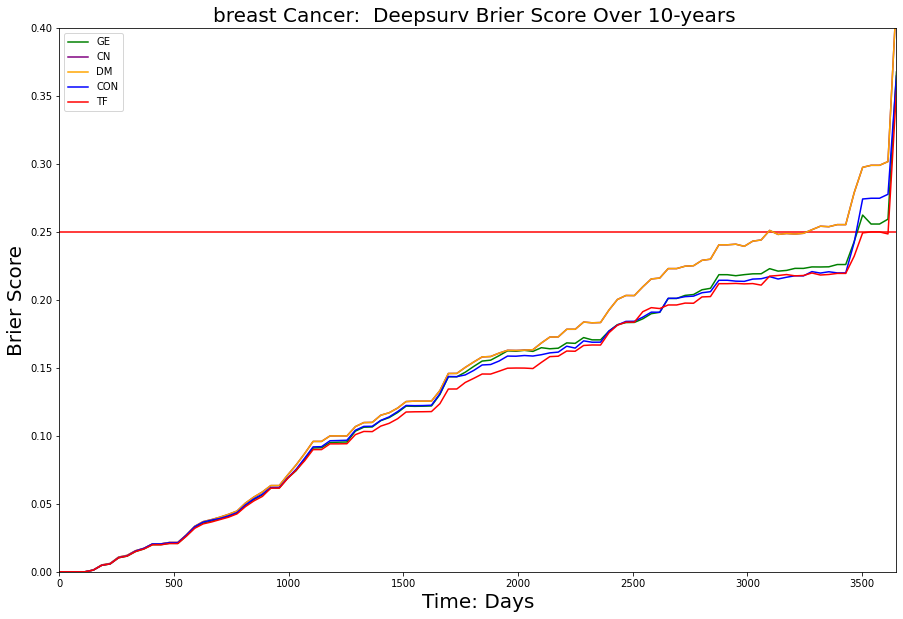

In [15]:
# plot Deepsurv Brier Score overtime breast cancer

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

ndata = "breast"


main_folder = '/content/drive/My Drive/deepsurv_DTF/TCGA/'

result_folder = main_folder + 'results/'


Brier_dsge= pd.read_csv(result_folder + ndata +"GE" + "Deepsurv" + "BSovertime.csv", sep=',',header=None).values
Brier_dscn= pd.read_csv(result_folder + ndata +"CN" + "Deepsurv" + "BSovertime.csv", sep=',',header=None).values
Brier_dsdm= pd.read_csv(result_folder + ndata +"CN" + "Deepsurv" + "BSovertime.csv", sep=',',header=None).values
Brier_dscon= pd.read_csv(result_folder + ndata +"CON" + "Deepsurv" + "BSovertime.csv", sep=',',header=None).values
Brier_ds= pd.read_csv(result_folder + ndata + "Deepsurv" + "BSovertime.csv", sep=',',header=None).values


x = np.linspace(0, 3650, 100)


plt.axhline(y=0.25, color='r', linestyle='-')

plt.plot(x, Brier_dsge, color='green',label = "GE")
plt.plot(x, Brier_dscn, color='purple',label = "CN")
plt.plot(x, Brier_dsdm, color='orange',label = "DM")
plt.plot(x, Brier_dscon, color='blue',label = "CON")
plt.plot(x, Brier_ds, color='red',label = "TF")

#plt.plot(x, Brier_logh,color='orange', label = "LogHazard")

plt.xlabel('Time: Days',fontsize = 20)
plt.ylabel('Brier Score',fontsize = 20)

plt.title(ndata + " Cancer:  Deepsurv Brier Score Over 10-years ",fontsize = 20)

plt.rcParams["figure.figsize"] = (15,10)
plt.ylim(0, 0.4)
plt.xlim(0,3650)

plt.legend()
plt.show()


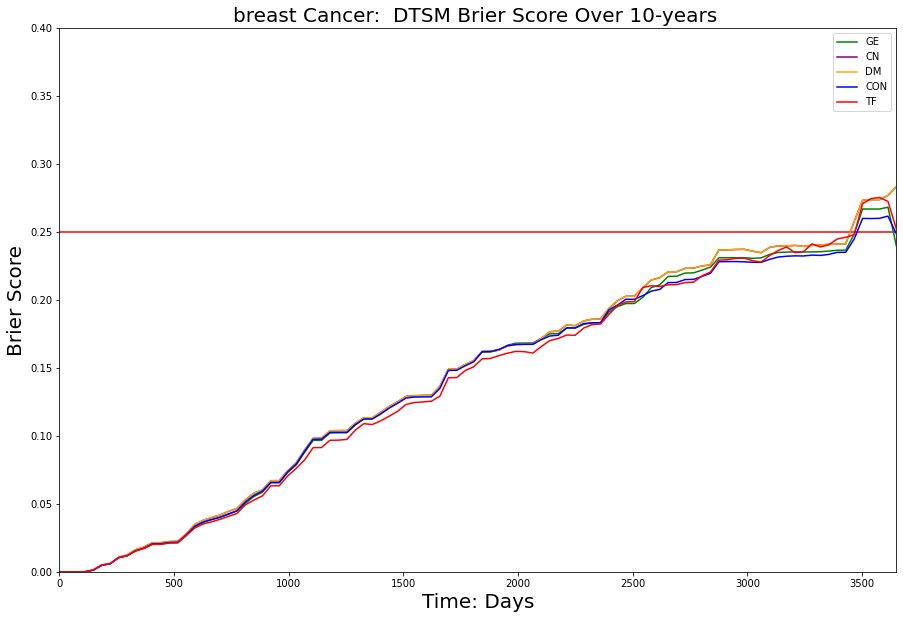

In [ ]:
#plot DTSM BS over time 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

ndata = "breast"


main_folder = '/content/drive/My Drive/deepsurv_DTF/TCGA/'

result_folder = main_folder + 'results/'


Brier_dsge= pd.read_csv(result_folder + ndata +"GE" + "DTSM" + "BSovertime.csv", sep=',',header=None).values
Brier_dscn= pd.read_csv(result_folder + ndata +"CN" + "DTSM" + "BSovertime.csv", sep=',',header=None).values
Brier_dsdm= pd.read_csv(result_folder + ndata +"CN" + "DTSM" + "BSovertime.csv", sep=',',header=None).values
Brier_dscon= pd.read_csv(result_folder + ndata +"CON" + "DTSM" + "BSovertime.csv", sep=',',header=None).values
Brier_ds= pd.read_csv(result_folder + ndata + "DTSM" + "BSovertime.csv", sep=',',header=None).values

x = np.linspace(0, 3650, 100)


plt.axhline(y=0.25, color='r', linestyle='-')

plt.plot(x, Brier_dsge, color='green',label = "GE")
plt.plot(x, Brier_dscn, color='purple',label = "CN")
plt.plot(x, Brier_dsdm, color='orange',label = "DM")
plt.plot(x, Brier_dscon, color='blue',label = "CON")
plt.plot(x, Brier_ds, color='red',label = "TF")

#plt.plot(x, Brier_logh,color='orange', label = "LogHazard")

plt.xlabel('Time: Days',fontsize = 20)
plt.ylabel('Brier Score',fontsize = 20)

plt.title(ndata + " Cancer:  DTSM Brier Score Over 10-years ",fontsize = 20)

plt.rcParams["figure.figsize"] = (15,10)
plt.ylim(0, 0.4)
plt.xlim(0,3650)

plt.legend()
plt.show()


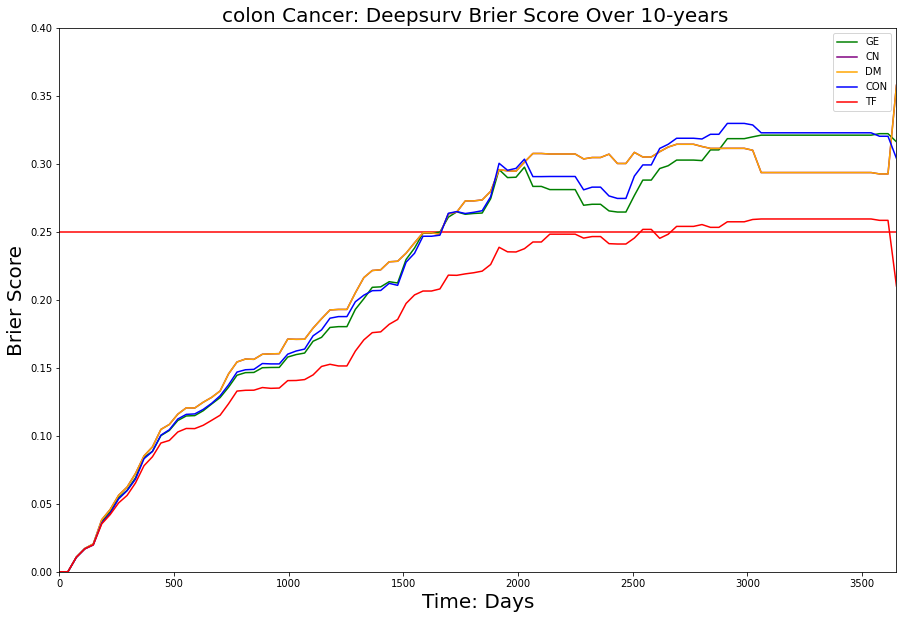

In [ ]:
#plot BS over time Deepsurv
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

ndata = "colon"

model_name = "Deepsurv"

main_folder = '/content/drive/My Drive/deepsurv_DTF/TCGA/'

result_folder = main_folder + 'results/'


Brier_dsge= pd.read_csv(result_folder + ndata +"GE" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dscn= pd.read_csv(result_folder + ndata +"CN" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dsdm= pd.read_csv(result_folder + ndata +"CN" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dscon= pd.read_csv(result_folder + ndata +"CON" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_ds= pd.read_csv(result_folder + ndata + model_name + "BSovertime.csv", sep=',',header=None).values


x = np.linspace(0, 3650, 100)


plt.axhline(y=0.25, color='r', linestyle='-')

plt.plot(x, Brier_dsge, color='green',label = "GE")
plt.plot(x, Brier_dscn, color='purple',label = "CN")
plt.plot(x, Brier_dsdm, color='orange',label = "DM")
plt.plot(x, Brier_dscon, color='blue',label = "CON")
plt.plot(x, Brier_ds, color='red',label = "TF")

#plt.plot(x, Brier_logh,color='orange', label = "LogHazard")

plt.xlabel('Time: Days',fontsize = 20)
plt.ylabel('Brier Score',fontsize = 20)

plt.title(ndata + " Cancer: " +  model_name + " Brier Score Over 10-years ",fontsize = 20)

plt.rcParams["figure.figsize"] = (15,10)
plt.ylim(0, 0.4)
plt.xlim(0,3650)

plt.legend()
plt.show()


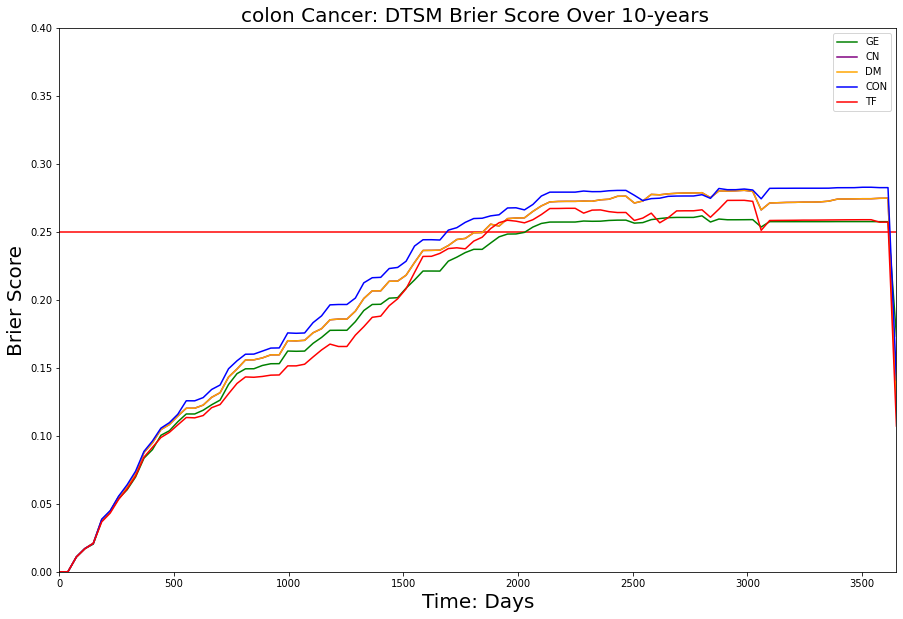

In [ ]:
#plot BS over time
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

ndata = "colon"

model_name = "DTSM"

main_folder = '/content/drive/My Drive/deepsurv_DTF/TCGA/'

result_folder = main_folder + 'results/'


Brier_dsge= pd.read_csv(result_folder + ndata +"GE" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dscn= pd.read_csv(result_folder + ndata +"CN" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dsdm= pd.read_csv(result_folder + ndata +"CN" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dscon= pd.read_csv(result_folder + ndata +"CON" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_ds= pd.read_csv(result_folder + ndata + model_name + "BSovertime.csv", sep=',',header=None).values


x = np.linspace(0, 3650, 100)


plt.axhline(y=0.25, color='r', linestyle='-')

plt.plot(x, Brier_dsge, color='green',label = "GE")
plt.plot(x, Brier_dscn, color='purple',label = "CN")
plt.plot(x, Brier_dsdm, color='orange',label = "DM")
plt.plot(x, Brier_dscon, color='blue',label = "CON")
plt.plot(x, Brier_ds, color='red',label = "TF")

#plt.plot(x, Brier_logh,color='orange', label = "LogHazard")

plt.xlabel('Time: Days',fontsize = 20)
plt.ylabel('Brier Score',fontsize = 20)

plt.title(ndata + " Cancer: " +  model_name + " Brier Score Over 10-years ",fontsize = 20)

plt.rcParams["figure.figsize"] = (15,10)
plt.ylim(0, 0.4)
plt.xlim(0,3650)

plt.legend()
plt.show()


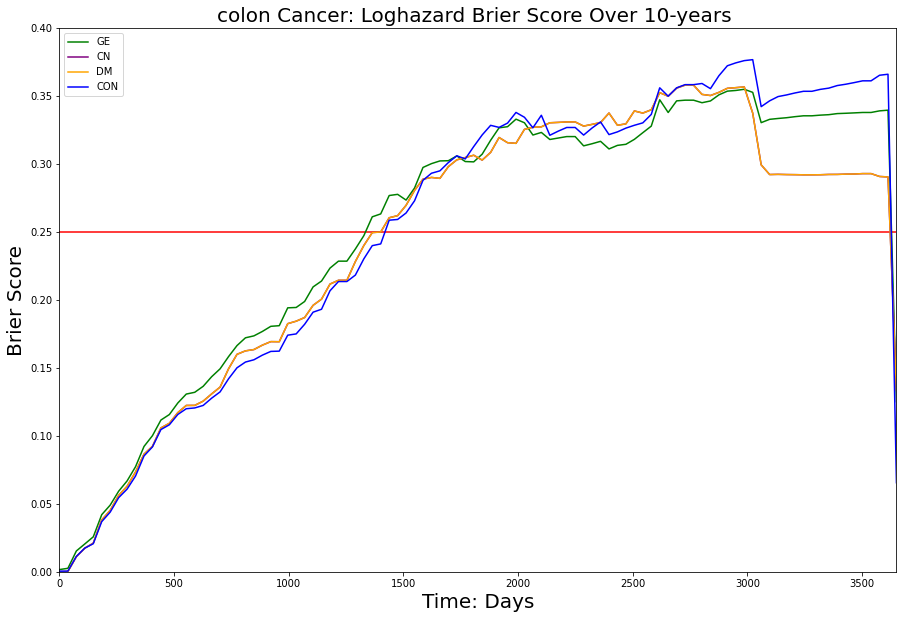

In [ ]:
#plot BS over time
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

ndata = "colon"

model_name = "Loghazard"

main_folder = '/content/drive/My Drive/deepsurv_DTF/TCGA/'

result_folder = main_folder + 'results/'


Brier_dsge= pd.read_csv(result_folder + ndata +"GE" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dscn= pd.read_csv(result_folder + ndata +"CN" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dsdm= pd.read_csv(result_folder + ndata +"CN" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dscon= pd.read_csv(result_folder + ndata +"CON" + model_name + "BSovertime.csv", sep=',',header=None).values

x = np.linspace(0, 3650, 100)


plt.axhline(y=0.25, color='r', linestyle='-')

plt.plot(x, Brier_dsge, color='green',label = "GE")
plt.plot(x, Brier_dscn, color='purple',label = "CN")
plt.plot(x, Brier_dsdm, color='orange',label = "DM")
plt.plot(x, Brier_dscon, color='blue',label = "CON")
#plt.plot(x, Brier_ds, color='red',label = "TF")

#plt.plot(x, Brier_logh,color='orange', label = "LogHazard")

plt.xlabel('Time: Days',fontsize = 20)
plt.ylabel('Brier Score',fontsize = 20)

plt.title(ndata + " Cancer: " +  model_name + " Brier Score Over 10-years ",fontsize = 20)

plt.rcParams["figure.figsize"] = (15,10)
plt.ylim(0, 0.4)
plt.xlim(0,3650)

plt.legend()
plt.show()


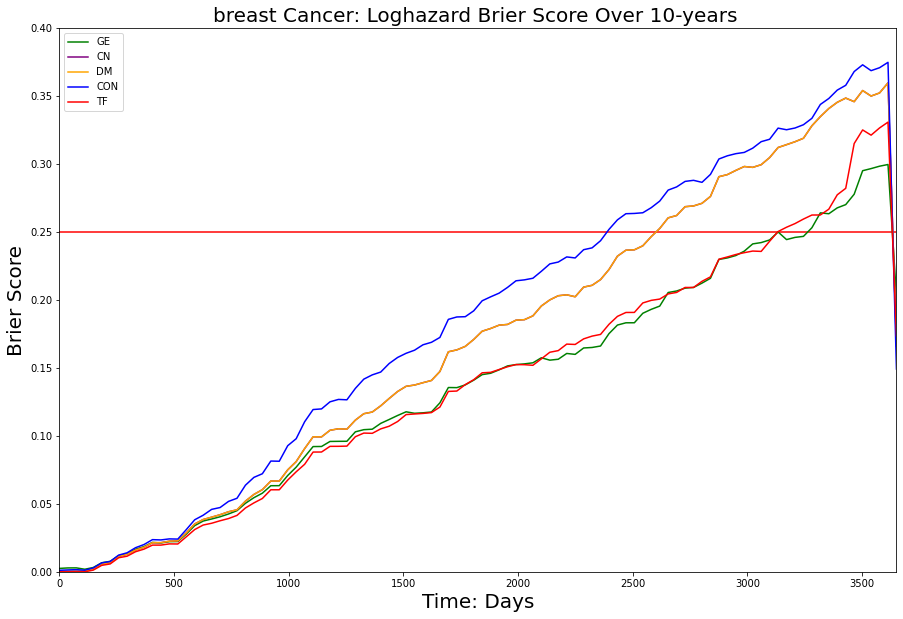

In [16]:
#plot BS over time
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

ndata = "breast"

model_name = "Loghazard"

main_folder = '/content/drive/My Drive/deepsurv_DTF/TCGA/'

result_folder = main_folder + 'results/'


Brier_dsge= pd.read_csv(result_folder + ndata +"GE" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dscn= pd.read_csv(result_folder + ndata +"CN" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dsdm= pd.read_csv(result_folder + ndata +"CN" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dscon= pd.read_csv(result_folder + ndata +"CON" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_ds= pd.read_csv(result_folder + ndata + model_name + "BSovertime.csv", sep=',',header=None).values



x = np.linspace(0, 3650, 100)


plt.axhline(y=0.25, color='r', linestyle='-')

plt.plot(x, Brier_dsge, color='green',label = "GE")
plt.plot(x, Brier_dscn, color='purple',label = "CN")
plt.plot(x, Brier_dsdm, color='orange',label = "DM")
plt.plot(x, Brier_dscon, color='blue',label = "CON")
plt.plot(x, Brier_ds, color='red',label = "TF")

#plt.plot(x, Brier_logh,color='orange', label = "LogHazard")

plt.xlabel('Time: Days',fontsize = 20)
plt.ylabel('Brier Score',fontsize = 20)

plt.title(ndata + " Cancer: " +  model_name + " Brier Score Over 10-years ",fontsize = 20)

plt.rcParams["figure.figsize"] = (15,10)
plt.ylim(0, 0.4)
plt.xlim(0,3650)

plt.legend()
plt.show()


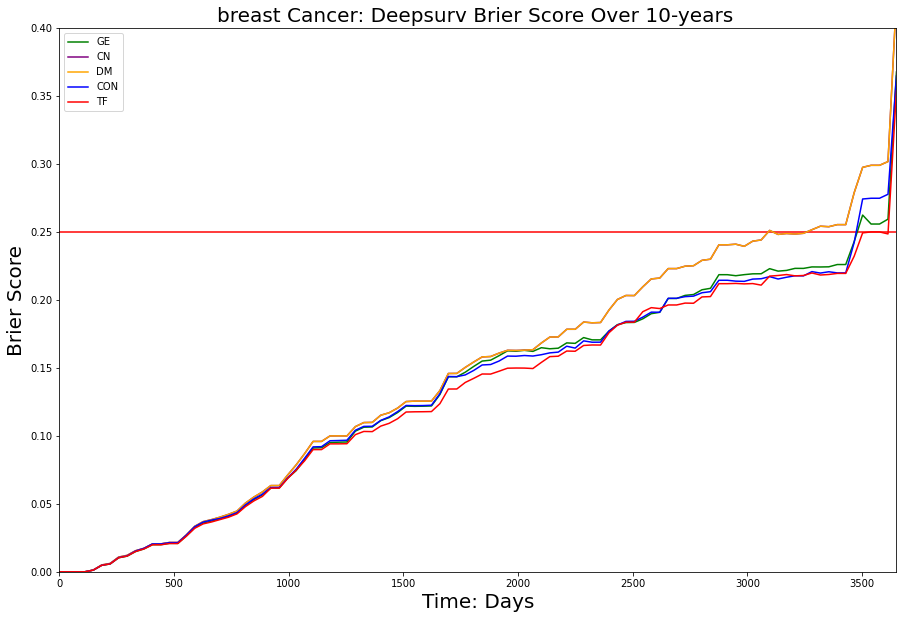

In [ ]:
#plot BS over time
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

ndata = "breast"

model_name = "Deepsurv"

main_folder = '/content/drive/My Drive/deepsurv_DTF/TCGA/'

result_folder = main_folder + 'results/'


Brier_dsge= pd.read_csv(result_folder + ndata +"GE" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dscn= pd.read_csv(result_folder + ndata +"CN" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dsdm= pd.read_csv(result_folder + ndata +"CN" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_dscon= pd.read_csv(result_folder + ndata +"CON" + model_name + "BSovertime.csv", sep=',',header=None).values
Brier_ds= pd.read_csv(result_folder + ndata + model_name + "BSovertime.csv", sep=',',header=None).values


x = np.linspace(0, 3650, 100)


plt.axhline(y=0.25, color='r', linestyle='-')

plt.plot(x, Brier_dsge, color='green',label = "GE")
plt.plot(x, Brier_dscn, color='purple',label = "CN")
plt.plot(x, Brier_dsdm, color='orange',label = "DM")
plt.plot(x, Brier_dscon, color='blue',label = "CON")
plt.plot(x, Brier_ds, color='red',label = "TF")

#plt.plot(x, Brier_logh,color='orange', label = "LogHazard")

plt.xlabel('Time: Days',fontsize = 20)
plt.ylabel('Brier Score',fontsize = 20)

plt.title(ndata + " Cancer: " +  model_name + " Brier Score Over 10-years ",fontsize = 20)

plt.rcParams["figure.figsize"] = (15,10)
plt.ylim(0, 0.4)
plt.xlim(0,3650)

plt.legend()
plt.show()
